In [2]:
import cv2

In [3]:
import matplotlib.pyplot as plt 

In [4]:
config_file='ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model='frozen_inference_graph.pb'

In [5]:
model = cv2.dnn_DetectionModel(frozen_model,config_file)

In [6]:
classLabels = []
file_name = 'coco.names.txt'
with open(file_name, 'rt') as fpt:
        classLabels = fpt.read().rstrip('\n').split('\n')

In [7]:
print(len(classLabels))

model.setInputSize(320,320)
model.setInputScale(1.0/127.5)
model.setInputMean((127.5, 127.5, 127.5))
model.setInputSwapRB(True)

80


<dnn_Model 0x11a7085b0>

# Read an image

In [8]:
img = cv2.imread('lena.png')

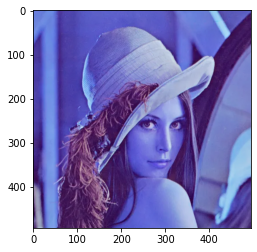

In [9]:
plt.imshow(img)

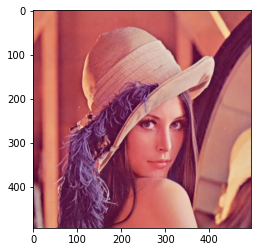

In [10]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [11]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)
print(ClassIndex)

[ 1 52]


In [12]:
print(classLabels[0])

person


In [13]:
print(classLabels[51])

carrot


In [14]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0), thickness=3)
    
    

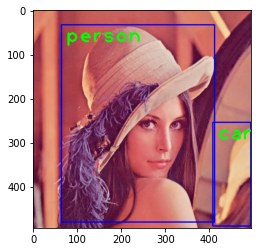

In [15]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [89]:
img2 = cv2.imread('test.png')

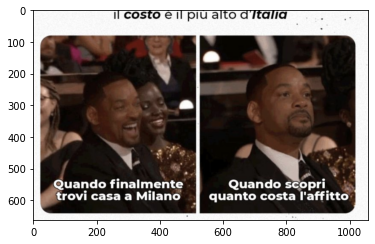

In [92]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

In [91]:
ClassIndex, confidence, bbox = model.detect(img2,confThreshold=0.5)
print(ClassIndex)

[ 1  1  1  1  1 32]


In [96]:
font_scale = 3
font = cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img, classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0), thickness=3)
    

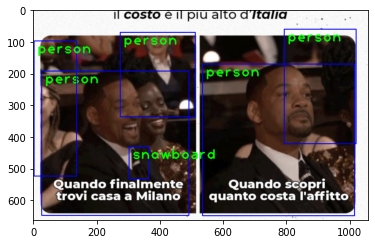

In [99]:
plt.imshow(cv2.cvtColor(img2, cv2.COLOR_BGR2RGB))

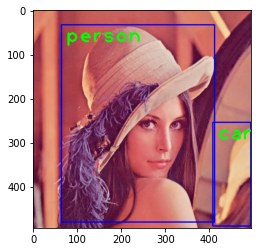

In [16]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Video Demo

In [16]:
#cap = cv2.VideoCapture("Lucerna.mp4")
cap = cv2.VideoCapture(1)

if not cap.isOpened():
    cap= cv2.videoCapture(0)
if not cap.isOpened():
    raise IOerror("cannot open the video")
    
font_scale=3
font = cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame= cap.read()
    
    ClassIndex, confidence, bbox, = model.detect(frame, confThreshold=0.55)
    
    print(ClassIndex)
    if (len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(),confidence.flatten(),bbox):
            if(ClassInd<=80):
                cv2.rectangle(frame,boxes,(255,0,0), 2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40),font,fontScale=font_scale,color=(0,255,0), thickness=3)
    
    cv2.imshow('object Detection tutorial',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()
                

[1 1]
[1]
[ 1 63]
[ 1 64 63]
[1]
[ 1 63]
[1]
[ 1 63]
[ 1 63]
[1]
[ 1 63]
[ 1 63 62]
[ 1 62 63]
[ 1 64 63]
[ 1 63 62]
[ 1 63]
[1]
[ 1 63]
[ 1 63 62]
[ 1 63]
[ 1 62 63 63]
[ 1 62]
[ 1 62]
[1]
[ 1 63]
[1]
[1]
[ 1 63 64]
[1]
[1]
[1]
[1]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[ 1 77]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
[1]
[1]
[1]
[1]
[ 1 63]
[1]
[1]
[ 1 27]
[1]
[1]
[1]
[1]
[ 1 63]
[1]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[1]
[1]
[ 1 63]
[ 1 63]
[ 1 63]
[1]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[ 1 63]
[1]
[ 1 27]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 63]
[1]
[1]
[ 1 63]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 62]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[ 1 77]
()
[63]
[63  1]
[1]
[ 1 63]
()
()
()
()
()
()
()
()
()
()
[77]
[62]
[62]
()
()
[62]
()
()
()
()
[62]
()
()
()
()
[62]
()
()
()
()
[77]
()
[1]
(